**We Prepare all the necessary data in one snippet before answering the questions**

*We call the dataset "imagenet100" even though we use imagenet10, so that the imported scripts keep working.*

In [ ]:
from google.colab import files, drive
uploaded = files.upload()
drive.mount('/content/drive', force_remount=True)

!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/wilson1yan/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')
!cp -r '/content/drive/MyDrive/Colab Notebooks/M2/analyse_tp5-2/data' .
!cp -r '/content/drive/MyDrive/Colab Notebooks/M2/analyse_tp5-2/results' .

from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting
%matplotlib inline

%mkdir ~/.kaggle
%cd ..
%cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
%cd cs294-158-ssl
! kaggle datasets download ambityga/imagenet100 -p 'data/imagenet/'
drive.flush_and_unmount()
!unzip -q 'data/imagenet/imagenet100.zip' -d 'data/imagenet/'
%rm -r 'data/imagenet/imagenet100.zip'
%mv data/imagenet/train.X1 data/imagenet/train
%mv data/imagenet/val.X data/imagenet/val
! python create_imagenet_subset.py 10
%mv data/imagenet10 data/imagenet100
! pip install git+https://github.com/ildoonet/pytorch-gradual-warmup-lr.git

Saving kaggle.json to kaggle.json
Mounted at /content/drive
Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 611 (delta 115), reused 119 (delta 53), pack-reused 422
Receiving objects: 100% (611/611), 3.11 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (424/424), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul-helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25298 sha256=91401b4c6585d8a0cdba37263512f81663b83a18bdf66a57c2df2a66eb57dd10
  Stored in directory: /root/.cache/pip/wheels/e3/df/97/281e32d717214451862e0e558746de423b9ef530b7376421e2
Successfully built deepul-helper
/content
/content/cs294-158-ssl
100% 16.1G/16.1G [06:51<00:00, 43.9MB/s]
100% 16.1G/16.1G [06:51<00:00, 42.1MB/s]
Creating a subset of ImageNet with 10 classes
100% 10/10 [00:24<00:00,  2.41s/it]
  Cloning https://github.c

We generate a test dataset from the training data (1250 images for the test out of 13000 images in total for all sets)

In [ ]:
import os
import shutil
from random import sample

data_path = '/content/cs294-158-ssl/data/imagenet100'
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

if not os.path.exists(test_path):
    os.makedirs(test_path)

class_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]

num_images_to_move = 125

for class_folder in class_folders:
    class_folder_path = os.path.join(train_path, class_folder)
    images = os.listdir(class_folder_path)

    if len(images) < num_images_to_move:
        print(f"Warning: Not enough images in {class_folder}. Only {len(images)} available.")
        continue

    images_to_move = sample(images, num_images_to_move)

    test_class_folder_path = os.path.join(test_path, class_folder)
    if not os.path.exists(test_class_folder_path):
        os.makedirs(test_class_folder_path)

    for image in images_to_move:
        src_path = os.path.join(class_folder_path, image)
        dst_path = os.path.join(test_class_folder_path, image)
        shutil.move(src_path, dst_path)

print("Images have been moved from 'train' to 'test'.")


Images have been moved from 'train' to 'test'.


**Question 3 :** We Redefine the evaluation function to return the test values so we can compare them.

In [ ]:
from deepul_helper.demos import evaluate_classifier
def evaluate_accuracy(model, linear_classifier, train_loader, test_loader):
    train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
    test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)

    print('Train Set')
    print(f'Top 1 Accuracy: {train_acc1}, Top 5 Accuracy: {train_acc5}\n')
    print('Test Set')
    print(f'Top 1 Accuracy: {test_acc1}, Top 5 Accuracy: {test_acc5}\n')
    return [test_acc1,test_acc5]

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder','cifar10')
Cifar10Context_encoder_accuracy = evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation','cifar10')
Cifar10Rotation_accuracy = evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr','cifar10')
Cifar10SimCLR_accuracy = evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

print('Evaluation : done')

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 79.33, Top 5 Accuracy: 99.066

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 90.07, Top 5 Accuracy: 99.524

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86

Evaluation : done


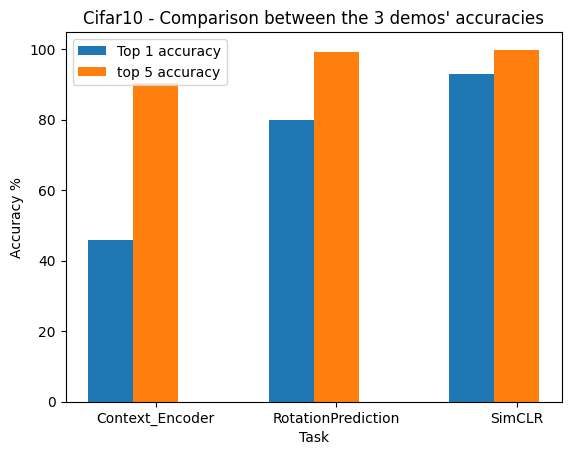

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

labels = ['Context_Encoder', 'RotationPrediction', 'SimCLR']
bar_width = 0.25
x = np.arange(len(labels))
plt.bar(x - bar_width, [Cifar10Context_encoder_accuracy[0], Cifar10Rotation_accuracy[0], Cifar10SimCLR_accuracy[0]], width=bar_width, label='Top 1 accuracy')
plt.bar(x, [Cifar10Context_encoder_accuracy[1], Cifar10Rotation_accuracy[1], Cifar10SimCLR_accuracy[1]], width=bar_width, label='top 5 accuracy')
plt.xticks(x, labels)
plt.legend()
plt.xlabel('Task')
plt.ylabel('Accuracy %')
plt.title('Cifar10 - Comparison between the 3 demos\' accuracies')

plt.show()

**Question 4 :** We Train the same models on imagenet10 before comparing them

1 - Context_Encoder

In [ ]:
! CUDA_VISIBLE_DEVICES=0 python train_self_supervised_task.py -d imagenet100 -t context_encoder -b 96 -e 10 --lr 1e-3 --o adam

Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
[W reducer.cpp:1346] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused p

2 - Rotation prediction

In [ ]:
! CUDA_VISIBLE_DEVICES=0 python train_self_supervised_task.py -d imagenet100 -t rotation -b 96 -e 10 --lr 1e-3 --o adam

Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
[W reducer.cpp:1346] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused p

3 - SimCLR

In [ ]:
! CUDA_VISIBLE_DEVICES=0 python train_self_supervised_task.py -d imagenet100 -t simclr -b 96 -e 10 --lr 1e-3 --o adam

Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
[W reducer.cpp:1346] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused p

Evaluation & comparison

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder','imagenet100')
Imagenet10Context_encoder_accuracy = evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Set
Top 1 Accuracy: 25.642553190190743, Top 5 Accuracy: 73.19999999610414

Test Set
Top 1 Accuracy: 27.200000076293946, Top 5 Accuracy: 72.80000054931641



In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation','imagenet100')
Imagenet10Rotation_accuracy = evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Set
Top 1 Accuracy: 52.77446810068983, Top 5 Accuracy: 90.40851062011718

Test Set
Top 1 Accuracy: 58.399999572753906, Top 5 Accuracy: 91.60000006103516



In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr','imagenet100')
Imagenet10SimCLR_accuracy = evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Set
Top 1 Accuracy: 41.09787234237346, Top 5 Accuracy: 86.80000002727103

Test Set
Top 1 Accuracy: 42.59999969482422, Top 5 Accuracy: 86.7999990234375



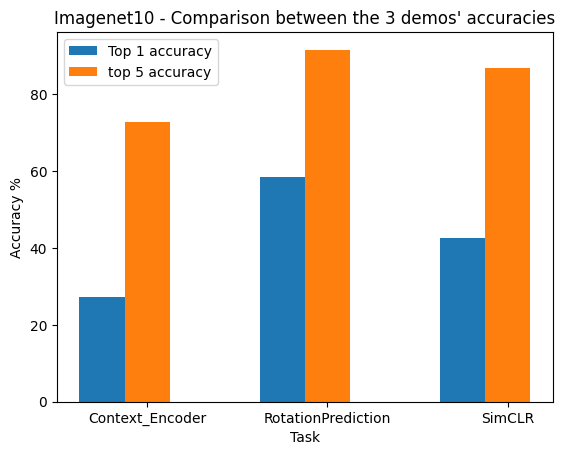

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

labels = ['Context_Encoder', 'RotationPrediction', 'SimCLR']
bar_width = 0.25
x = np.arange(len(labels))
plt.bar(x - bar_width, [Imagenet10Context_encoder_accuracy[0], Imagenet10Rotation_accuracy[0], Imagenet10SimCLR_accuracy[0]], width=bar_width, label='Top 1 accuracy')
plt.bar(x, [Imagenet10Context_encoder_accuracy[1], Imagenet10Rotation_accuracy[1], Imagenet10SimCLR_accuracy[1]], width=bar_width, label='top 5 accuracy')
plt.xticks(x, labels)
plt.legend()
plt.xlabel('Task')
plt.ylabel('Accuracy %')
plt.title('Imagenet10 - Comparison between the 3 demos\' accuracies')

plt.show()

**Question 5 :** We implement relative patch position prediction

*We only show the best model for Imagenet10, and the best model for Cifar10 (the report contains more informations about the other models that have been tried)*

Imagenet10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np
import torchvision.models as models

class RelativePatchDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.classes = sorted(os.listdir(root_dir))

        for class_dir in self.classes:
            class_path = os.path.join(root_dir, class_dir)
            if os.path.isdir(class_path):
                for img_file in sorted(os.listdir(class_path)):
                    img_path = os.path.join(class_path, img_file)
                    if os.path.isfile(img_path):
                        self.image_paths.append((img_path, class_dir))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path, class_name = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')
        img1, img2, label = self.get_relative_patch(img)
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        return (img1, img2), label

    def get_relative_patch(self, img):
        width, height = img.size
        patch_size = (height // 4, width // 4)

        center_x = np.random.randint(patch_size[1] // 2, width - patch_size[1] // 2)
        center_y = np.random.randint(patch_size[0] // 2, height - patch_size[0] // 2)
        left_x = center_x - patch_size[1] // 2
        right_x = center_x + patch_size[1] // 2
        top_y = center_y - patch_size[0] // 2
        bottom_y = center_y + patch_size[0] // 2

        patch1 = img.crop((left_x, top_y, right_x, bottom_y))

        positions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)]
        rel_pos = positions[np.random.randint(len(positions))]

        center_x2 = center_x + rel_pos[0] * patch_size[1]
        center_y2 = center_y + rel_pos[1] * patch_size[0]
        center_x2 = max(patch_size[1] // 2, min(width - patch_size[1] // 2, center_x2))
        center_y2 = max(patch_size[0] // 2, min(height - patch_size[0] // 2, center_y2))

        left_x2 = center_x2 - patch_size[1] // 2
        right_x2 = center_x2 + patch_size[1] // 2
        top_y2 = center_y2 - patch_size[0] // 2
        bottom_y2 = center_y2 + patch_size[0] // 2

        patch2 = img.crop((left_x2, top_y2, right_x2, bottom_y2))

        label = positions.index(rel_pos)

        return patch1, patch2, label

class PatchPredictionModel(nn.Module):
    def __init__(self):
        super(PatchPredictionModel, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        #We modify resnet input layer to take 6 channels so we can give it the concatenated patches
        self.resnet.conv1 = nn.Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.resnet.fc = nn.Linear(in_features=512, out_features=8, bias=True)

    def forward(self, x):
        return self.resnet(x)

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    for (img1, img2), labels in train_loader:
        images = torch.cat((img1, img2), dim=1)
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_top1 = 0
    correct_top5 = 0
    with torch.no_grad():
        for (img1, img2), labels in val_loader:
            images = torch.cat((img1, img2), dim=1)
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.topk(outputs, 5, dim=1)
            correct_top1 += (preds[:, 0] == labels).float().sum().item()
            correct_top5 += (preds == labels.unsqueeze(1)).float().sum().item()

    return total_loss / len(val_loader), correct_top1 / len(val_loader.dataset), correct_top5 / len(val_loader.dataset)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    #tentative de modifications supplémentaires, ne marche pas bien, à tester plus profondément
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(degrees=10),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = RelativePatchDataset('/content/cs294-158-ssl/data/imagenet100/train', transform=transform)
val_dataset = RelativePatchDataset('/content/cs294-158-ssl/data/imagenet100/val', transform=transform)
test_data = RelativePatchDataset('/content/cs294-158-ssl/data/imagenet100/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model = PatchPredictionModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, top1_accuracy, top5_accuracy = evaluate(model, val_loader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, '
          f'Validation Loss: {val_loss:.4f}, '
          f'Top-1 Accuracy: {top1_accuracy:.4f}, '
          f'Top-5 Accuracy: {top5_accuracy:.4f}')



Epoch 1/10, Train Loss: 2.2046, Validation Loss: 2.1184, Top-1 Accuracy: 0.1660, Top-5 Accuracy: 0.6840
Epoch 2/10, Train Loss: 2.0607, Validation Loss: 2.0246, Top-1 Accuracy: 0.1840, Top-5 Accuracy: 0.7420
Epoch 3/10, Train Loss: 1.9951, Validation Loss: 1.9661, Top-1 Accuracy: 0.2100, Top-5 Accuracy: 0.7580
Epoch 4/10, Train Loss: 1.9439, Validation Loss: 1.9148, Top-1 Accuracy: 0.2380, Top-5 Accuracy: 0.8160
Epoch 5/10, Train Loss: 1.9030, Validation Loss: 1.8773, Top-1 Accuracy: 0.2400, Top-5 Accuracy: 0.8320
Epoch 6/10, Train Loss: 1.8494, Validation Loss: 1.7962, Top-1 Accuracy: 0.2840, Top-5 Accuracy: 0.8800
Epoch 7/10, Train Loss: 1.8290, Validation Loss: 1.7689, Top-1 Accuracy: 0.2820, Top-5 Accuracy: 0.8680
Epoch 8/10, Train Loss: 1.7759, Validation Loss: 1.7428, Top-1 Accuracy: 0.3220, Top-5 Accuracy: 0.8680
Epoch 9/10, Train Loss: 1.7582, Validation Loss: 1.6773, Top-1 Accuracy: 0.3440, Top-5 Accuracy: 0.8980
Epoch 10/10, Train Loss: 1.7264, Validation Loss: 1.7246, Top-1 

We execute the model on the test set

In [ ]:
test_loss, Patch_IMAGENET_top1_accuracy, Patch_IMAGENET_top5_accuracy = evaluate(model, test_loader, criterion, device)
print('Relative patch position prediction \nTOP 1 accuracy : ',Patch_IMAGENET_top1_accuracy,'\nTOP 5 accuracy : ',Patch_IMAGENET_top5_accuracy)

Relative patch position prediction 
TOP 1 accuracy :  0.368 
TOP 5 accuracy :  0.914


Cifar10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from PIL import Image
from torch.utils.data import random_split

class RelativePatchDataset(CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super(RelativePatchDataset, self).__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)

    def __getitem__(self, index):
        img, _ = self.data[index], self.targets[index]
        img = Image.fromarray(img)
        img1, img2, label = self.get_relative_patch(img)
        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        return (img1, img2), label

    def get_relative_patch(self, img):
        width, height = img.size
        patch_size = (height // 4, width // 4)

        center_x = np.random.randint(patch_size[1] // 2, width - patch_size[1] // 2)
        center_y = np.random.randint(patch_size[0] // 2, height - patch_size[0] // 2)
        left_x = center_x - patch_size[1] // 2
        right_x = center_x + patch_size[1] // 2
        top_y = center_y - patch_size[0] // 2
        bottom_y = center_y + patch_size[0] // 2

        patch1 = img.crop((left_x, top_y, right_x, bottom_y))
        positions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)]
        rel_pos = positions[np.random.randint(len(positions))]

        center_x2 = center_x + rel_pos[0] * patch_size[1]
        center_y2 = center_y + rel_pos[1] * patch_size[0]
        center_x2 = max(patch_size[1] // 2, min(width - patch_size[1] // 2, center_x2))
        center_y2 = max(patch_size[0] // 2, min(height - patch_size[0] // 2, center_y2))

        left_x2 = center_x2 - patch_size[1] // 2
        right_x2 = center_x2 + patch_size[1] // 2
        top_y2 = center_y2 - patch_size[0] // 2
        bottom_y2 = center_y2 + patch_size[0] // 2

        patch2 = img.crop((left_x2, top_y2, right_x2, bottom_y2))

        label = positions.index(rel_pos)
        return patch1, patch2, label

class PatchPredictionModel(nn.Module):
    def __init__(self):
        super(PatchPredictionModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 2 * 2, 1000),
            nn.ReLU(),
            nn.Linear(1000, 8)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    for (img1, img2), labels in train_loader:
        images = torch.cat((img1, img2), dim=1)
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_top1 = 0
    correct_top5 = 0
    with torch.no_grad():
        for (img1, img2), labels in val_loader:
            images = torch.cat((img1, img2), dim=1)
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.topk(outputs, 5, dim=1)
            correct_top1 += (preds[:, 0] == labels).sum().item()
            correct_top5 += torch.sum(preds == labels.view(-1, 1)).item()
    return total_loss / len(val_loader), correct_top1 / len(val_loader.dataset), correct_top5 / len(val_loader.dataset)

batch_size = 64
learning_rate = 0.001
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

if not os.path.exists('./data/cifar10-3'):
    os.makedirs('./data/cifar10-3')

full_train_dataset = RelativePatchDataset(root='./data/cifar10-3', train=True, transform=transform, download=True)

train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

test_dataset = RelativePatchDataset(root='./data/cifar10-3', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model = PatchPredictionModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, top1_accuracy, top5_accuracy = evaluate(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Validation Loss: {val_loss:.4f}, "
          f"Top-1 Accuracy: {top1_accuracy:.4f}, "
          f"Top-5 Accuracy: {top5_accuracy:.4f}")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Train Loss: 1.9504, Validation Loss: 1.8385, Top-1 Accuracy: 0.2637, Top-5 Accuracy: 0.8482
Epoch 2/10, Train Loss: 1.7788, Validation Loss: 1.7156, Top-1 Accuracy: 0.3213, Top-5 Accuracy: 0.8904
Epoch 3/10, Train Loss: 1.6801, Validation Loss: 1.6826, Top-1 Accuracy: 0.3479, Top-5 Accuracy: 0.8965
Epoch 4/10, Train Loss: 1.6189, Validation Loss: 1.5792, Top-1 Accuracy: 0.3774, Top-5 Accuracy: 0.9214
Epoch 5/10, Train Loss: 1.5879, Validation Loss: 1.5881, Top-1 Accuracy: 0.3821, Top-5 Accuracy: 0.9207
Epoch 6/10, Train Loss: 1.5510, Validation Loss: 1.5315, Top-1 Accuracy: 0.3981, Top-5 Accuracy: 0.9353
Epoch 7/10, Train Loss: 1.5284, Validation Loss: 1.5112, Top-1 Accuracy: 0.4101, Top-5 Accuracy: 0.9358
Epoch 8/10, Train Loss: 1.4950, Validation Loss: 1.4961, Top-1 Accuracy: 0.4132, Top-5 Accuracy: 0.9374
Epoch 9/10, Train Loss: 1.4777, Validation Loss: 1.4730, Top-1 Accuracy: 0.4329, Top-5 Accur

We execute the model on the test set

In [ ]:
test_loss, Patch_CIFAR_top1_accuracy, Patch_CIFAR_top5_accuracy = evaluate(model, test_loader, criterion, device)
print('Relative patch position prediction \nTOP 1 accuracy : ',Patch_CIFAR_top1_accuracy,'\nTOP 5 accuracy : ',Patch_CIFAR_top5_accuracy)

Relative patch position prediction 
TOP 1 accuracy :  0.4295 
TOP 5 accuracy :  0.9468


**Question 6 :** We compare the relative patch position prediction models with the previous models on each dataset

Cifar10

In [ ]:
Patch_CIFAR_top1_accuracy *=100
Patch_CIFAR_top5_accuracy *=100

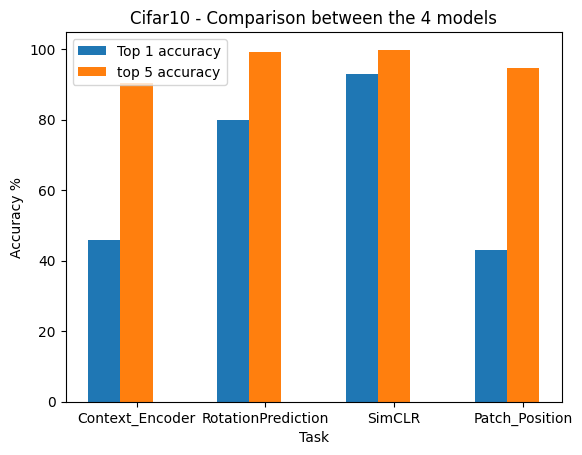

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

labels = ['Context_Encoder', 'RotationPrediction', 'SimCLR', 'Patch_Position']
bar_width = 0.25
x = np.arange(len(labels))
plt.bar(x - bar_width, [Cifar10Context_encoder_accuracy[0], Cifar10Rotation_accuracy[0], Cifar10SimCLR_accuracy[0], Patch_CIFAR_top1_accuracy], width=bar_width, label='Top 1 accuracy')
plt.bar(x, [Cifar10Context_encoder_accuracy[1], Cifar10Rotation_accuracy[1], Cifar10SimCLR_accuracy[1], Patch_CIFAR_top5_accuracy], width=bar_width, label='top 5 accuracy')
plt.xticks(x, labels)
plt.legend()
plt.xlabel('Task')
plt.ylabel('Accuracy %')
plt.title('Cifar10 - Comparison between the 4 models')

plt.show()

Imagenet10

In [ ]:
Patch_IMAGENET_top1_accuracy *=100
Patch_IMAGENET_top5_accuracy *=100

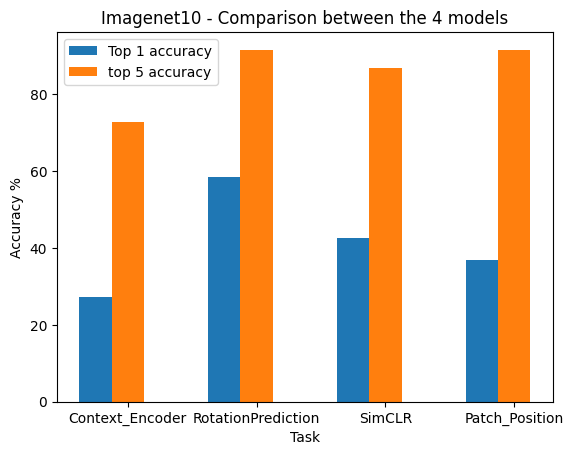

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()

labels = ['Context_Encoder', 'RotationPrediction', 'SimCLR', 'Patch_Position']
bar_width = 0.25
x = np.arange(len(labels))
plt.bar(x - bar_width, [Imagenet10Context_encoder_accuracy[0], Imagenet10Rotation_accuracy[0], Imagenet10SimCLR_accuracy[0], Patch_IMAGENET_top1_accuracy], width=bar_width, label='Top 1 accuracy')
plt.bar(x, [Imagenet10Context_encoder_accuracy[1], Imagenet10Rotation_accuracy[1], Imagenet10SimCLR_accuracy[1],Patch_IMAGENET_top5_accuracy], width=bar_width, label='top 5 accuracy')
plt.xticks(x, labels)
plt.legend()
plt.xlabel('Task')
plt.ylabel('Accuracy %')
plt.title('Imagenet10 - Comparison between the 4 models')

plt.show()

**The report contains all the conclusions and hypotheses that were made for each question.**

Thank you for your time.